# Formative Assessment

## Michael NANA KAMENI

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Load data

In [3]:
filename = 'AirQualityUCI.csv'
df = pd.read_csv(filename, sep =',')

In [4]:
'''# Create heatmap using seaborn's style gradient for dataframe stype
hm = sns.light_palette('green',as_cmap = True )
style = df.style.background_gradient(cmap = hm)
style'''

"# Create heatmap using seaborn's style gradient for dataframe stype\nhm = sns.light_palette('green',as_cmap = True )\nstyle = df.style.background_gradient(cmap = hm)\nstyle"

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


In [6]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
9352,04/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,0.7568
9353,04/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,0.7119
9354,04/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,0.6406
9355,04/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,0.5139
9356,04/04/2005,14.00.00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,0.5028


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
AH               9357 non-null float64
dtypes: float64(4), int64(8), object(2)
memory usage: 1023.5+ KB


### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

In [8]:
(df.iloc[:, 2:] == -200.0).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1276db2d0>,
      dtype=object)

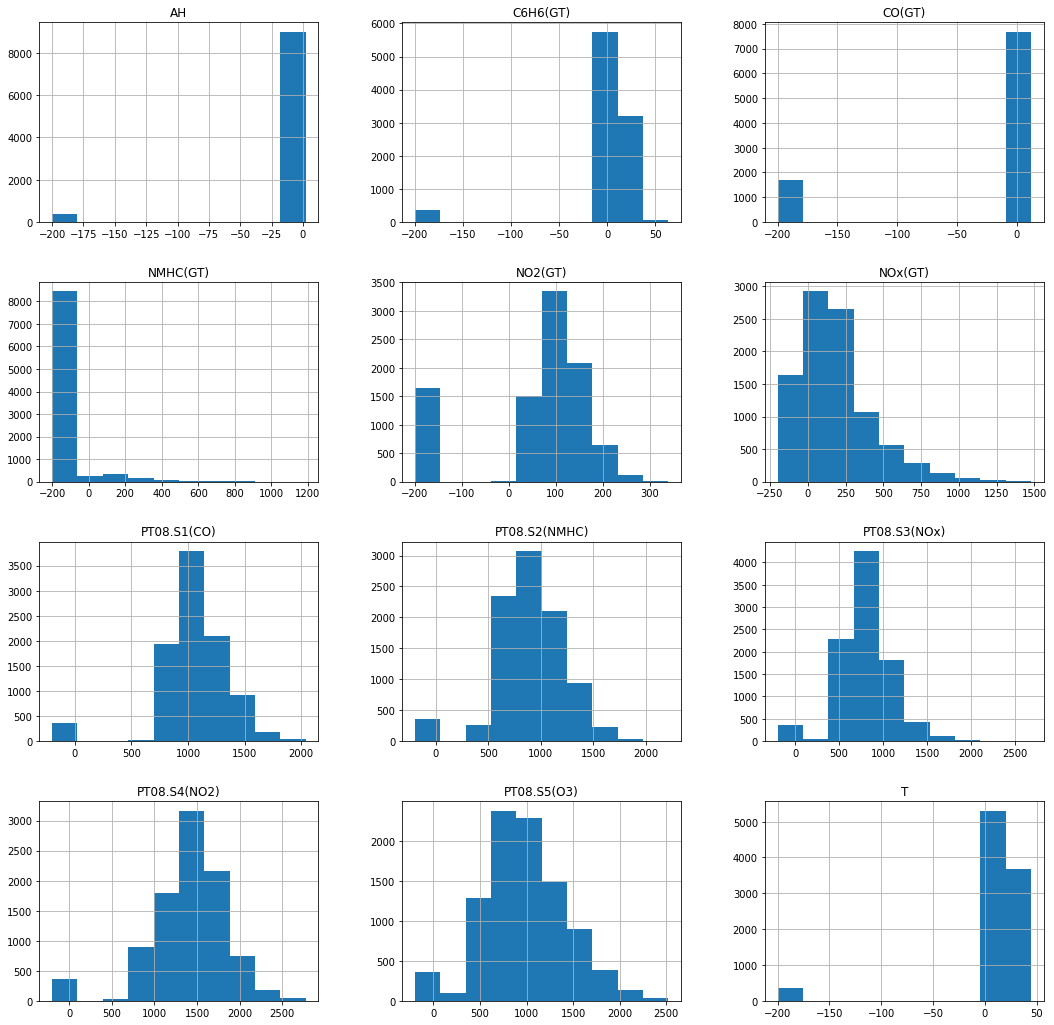

In [9]:
pd.DataFrame.hist(df, figsize=(18,18))

In [10]:
df.replace(-200, np.NaN, inplace = True)

In [11]:
# Print out the columns with any missing value 
df.loc[:,df.isnull().any()]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,0.7568
9353,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,0.7119
9354,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,0.6406
9355,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,0.5139


In [12]:
# print out the number of missing value for each column
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

In [13]:
# Fill the missing values with mean
df['CO(GT)'].fillna(df['CO(GT)'].median(), inplace = True)
df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].median(), inplace = True)
df['NMHC(GT)'].fillna(df['NMHC(GT)'].median(), inplace = True)
df['C6H6(GT)'].fillna(df['C6H6(GT)'].median(), inplace = True)
df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].median(), inplace = True)
df['NOx(GT)'].fillna(df['NOx(GT)'].median(), inplace = True)
df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].median(), inplace = True)
df['NO2(GT)'].fillna(df['NO2(GT)'].median(), inplace = True)
df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].median(), inplace = True)
df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].median(), inplace = True)
df['T'].fillna(df['T'].median(), inplace = True)
df['AH'].fillna(df['AH'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1290c48d0>,
      dtype=object)

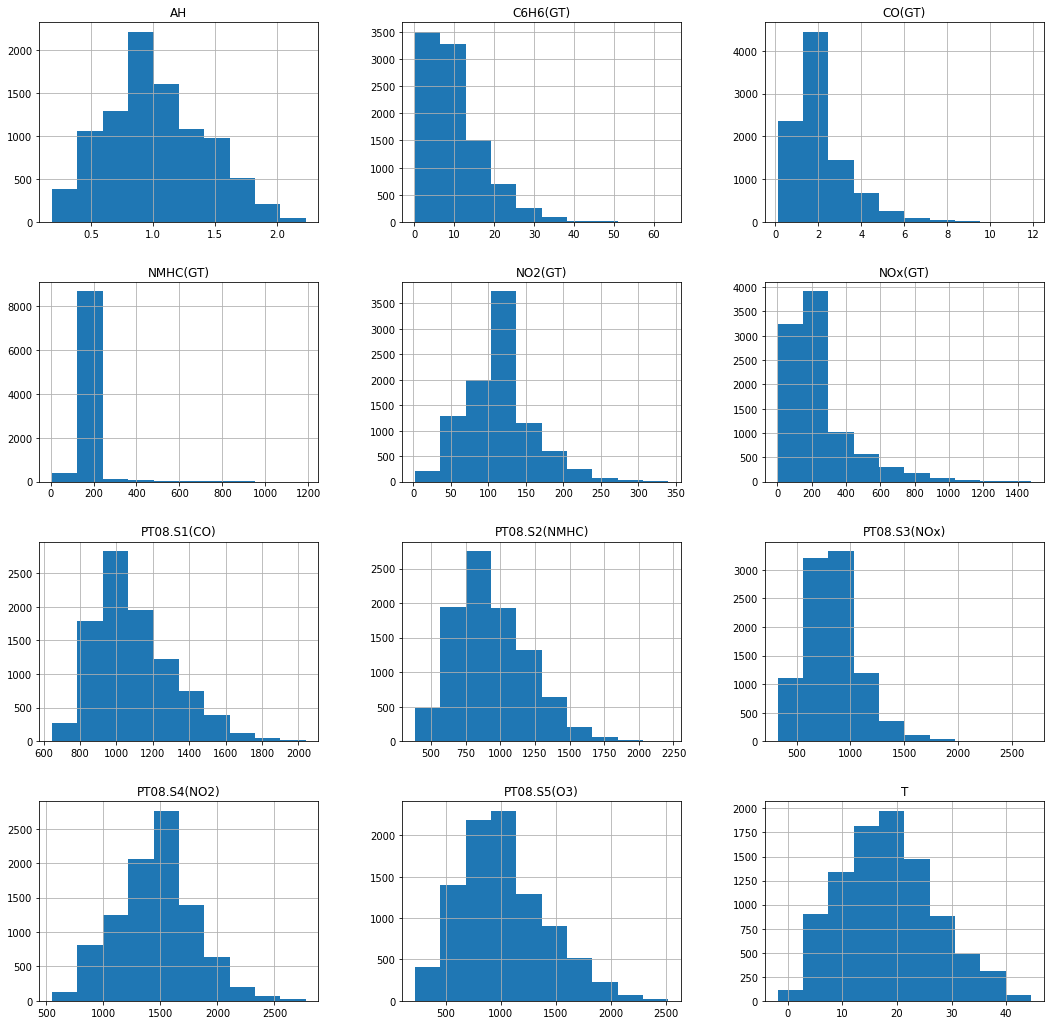

In [14]:
pd.DataFrame.hist(df, figsize=(18,18))

Let us have a look at the relationship between different features: The pairplot is suitable to have a quick global view of that.

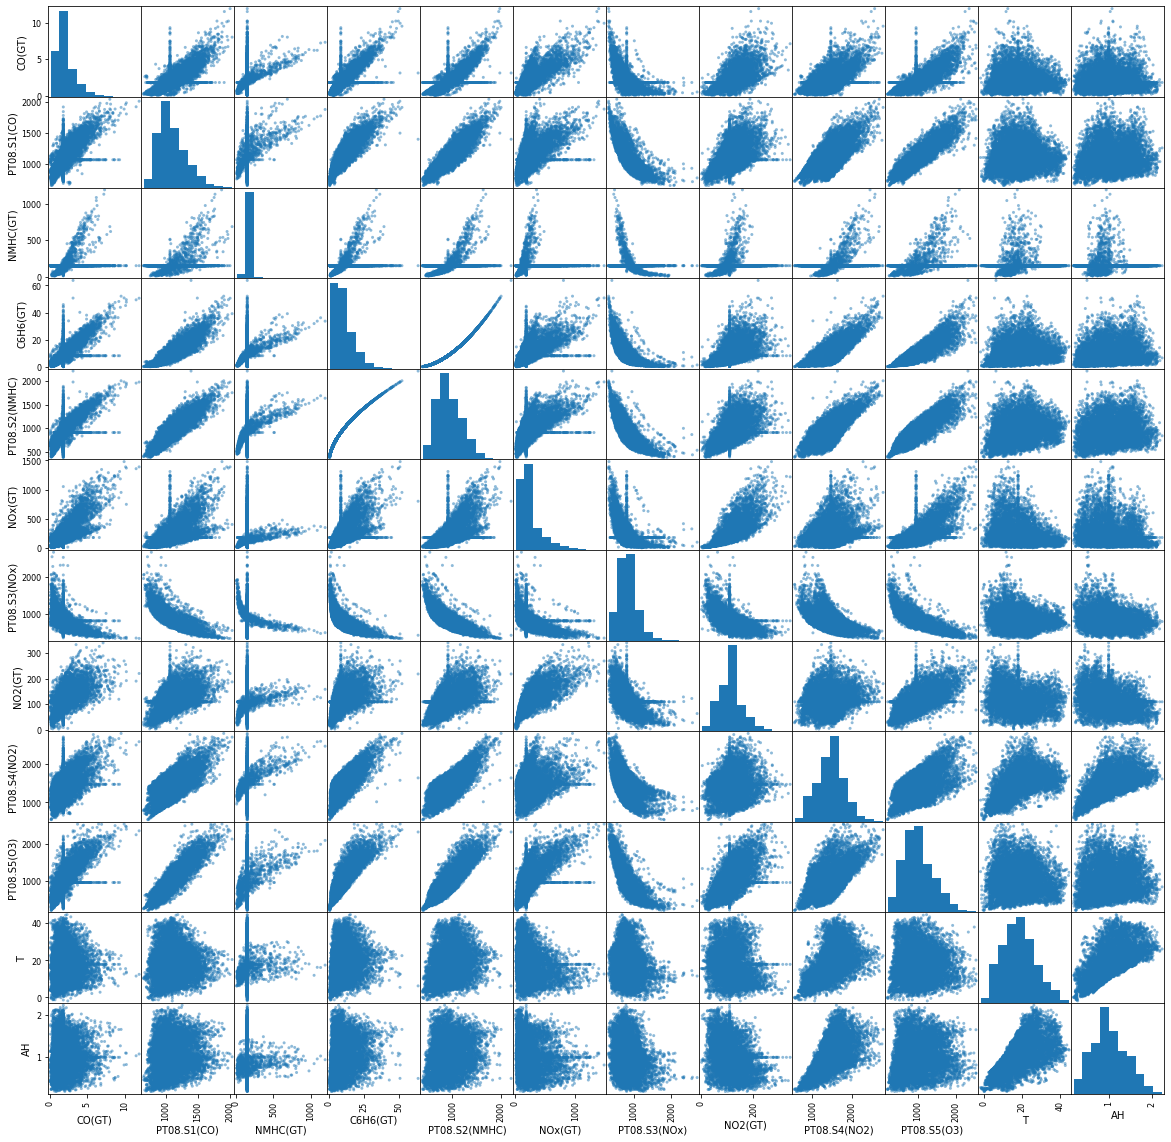

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20));

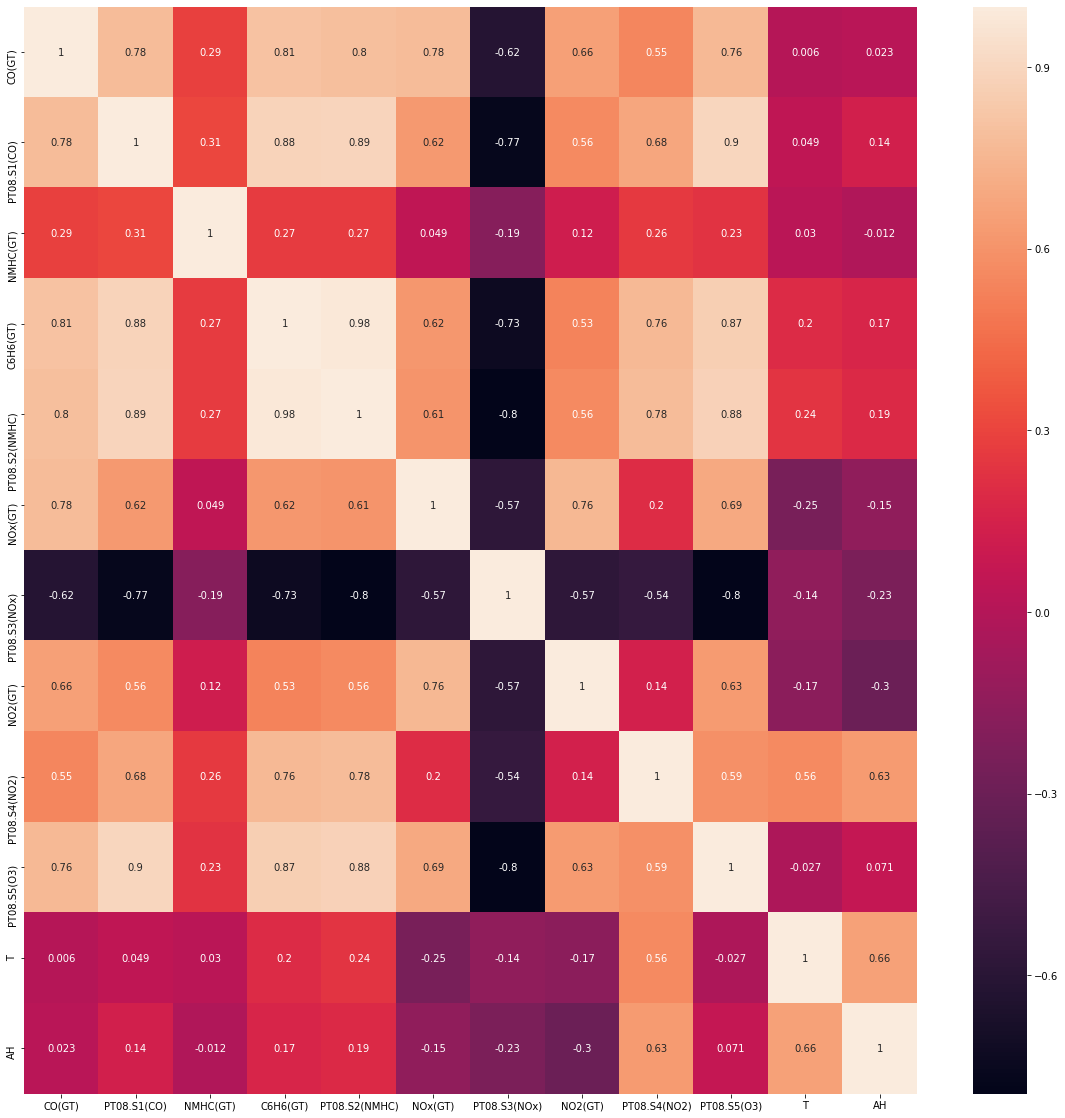

In [16]:
matrix_corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(matrix_corr, annot = True)

### Feature Selection

Visualizing the two precedent graph, one may easily decide to select the following feature to continue with:
  - True hourly averaged concentration CO in mg/$m^3$ (CO(GT))
  - Hourly averaged sensor response (PT08.S1 (tin oxide))
  - True hourly averaged Benzene concentration in microg/$m^3$ (C6H6(GT))
  - Hourly averaged sensor response (PT08.S2 (titania)) 
  - True hourly averaged NOx concentration in ppb (NOx(GT))
  - Hourly averaged sensor response (PT08.S3 (tungsten oxide))
  - True hourly averaged NO2 concentration in microg/$m^3$ (NO2(GT))
  - Hourly averaged sensor response (PT08.S5 (indium oxide))
  
Those are up here the feature strongly correlated that worth being exploited for further analysis.

Since we are studying many features of different unit in our dataset, it is worth using standardization to rescale the data points distribution between 0 and 1.

### Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df1 = df.drop(columns =['Date','Time', 'NMHC(GT)', 'PT08.S4(NO2)', 'T','AH'])
df_scaled = scaler.fit_transform(df1)
df_scaled

array([[ 0.38602857,  1.22878092,  0.25857669, ...,  0.88031796,
         0.01426055,  0.63321354],
       [-0.06750209,  0.90938228, -0.08335601, ...,  1.34895235,
        -0.46359679, -0.12427676],
       [ 0.0836748 ,  1.42605656, -0.13806524, ...,  1.2139221 ,
         0.03701566,  0.1367503 ],
       ...,
       [ 0.23485168,  0.20482644,  0.32696323, ..., -0.91876154,
         1.42507745,  0.1828139 ],
       [ 0.00808636, -0.44806197, -0.0696787 , ..., -0.52558523,
         0.99273034, -0.64121271],
       [ 0.0836748 , -0.12866333,  0.25857669, ..., -0.71621617,
         1.26579167, -0.52349462]])

Let us convert the result into dataframe to have a look at the distribution of data.

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)'])

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e735ed0>,
      dtype=object)

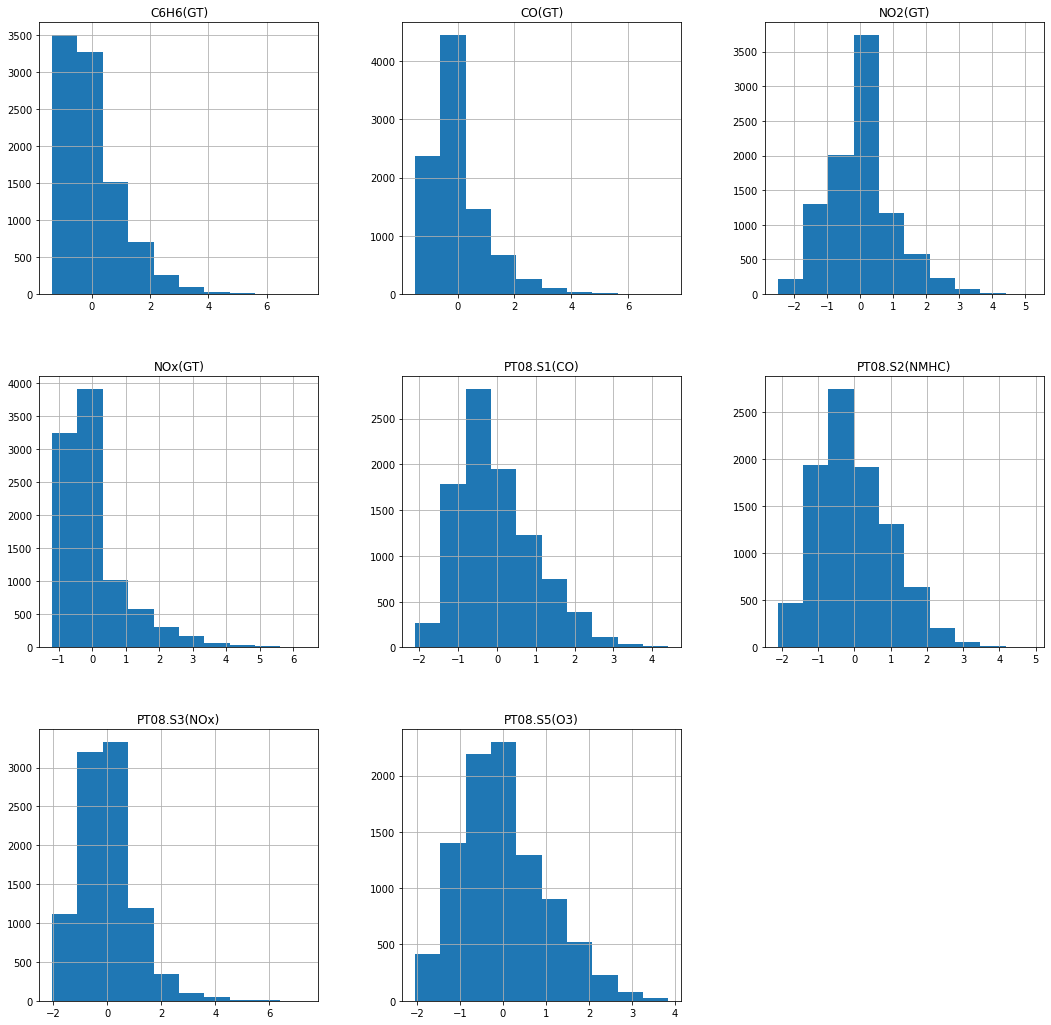

In [19]:
pd.DataFrame.hist(df_scaled, figsize=(18,18))

###  Now let's check the mean and standard deviation values

In [20]:
print('Mean of data scale is:' + str(df_scaled.mean(axis=0)))
print('Standard deviation of data scale is:' + str(df_scaled.std(axis=0)))

Mean of data scale is:CO(GT)           3.259076e-15
PT08.S1(CO)      2.996368e-16
C6H6(GT)         5.506917e-16
PT08.S2(NMHC)    5.295184e-16
NOx(GT)         -1.880502e-14
PT08.S3(NOx)    -8.228133e-16
NO2(GT)          5.389322e-15
PT08.S5(O3)     -1.711312e-16
dtype: float64
Standard deviation of data scale is:CO(GT)           1.000053
PT08.S1(CO)      1.000053
C6H6(GT)         1.000053
PT08.S2(NMHC)    1.000053
NOx(GT)          1.000053
PT08.S3(NOx)     1.000053
NO2(GT)          1.000053
PT08.S5(O3)      1.000053
dtype: float64


As expected, the mean of each variable is now around zero and the standard deviation is set to $1.000053\approx 1$. Thus, all the variable values lie within the same range.

But our study address specifically the relationship between the predictor features <b> PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)</b> and <b> True hourly averaged Benzene concentration in microg/$m^3$ (reference analyzer)</b>. We are going to restandardize those variable since the number of feature could influence the quality of the training. 

####  Specific case study

In [21]:
X1 = df[['PT08.S1(CO)', 'C6H6(GT)']]
X_scaled = scaler.fit_transform(X1)
X_scaled

array([[ 1.22878092,  0.25857669],
       [ 0.90938228, -0.08335601],
       [ 1.42605656, -0.13806524],
       ...,
       [ 0.20482644,  0.32696323],
       [-0.44806197, -0.0696787 ],
       [-0.12866333,  0.25857669]])

####  Now let's check the mean and standard deviation values of the specific case study

In [22]:
print('Mean of data scale is:' + str(X_scaled.mean(axis=0)))
print('Standard deviation of data scale is:' + str(X_scaled.std(axis=0)))

Mean of data scale is:[ 2.39960997e-16 -1.82248858e-16]
Standard deviation of data scale is:[1. 1.]


As expected, the mean of each variable is now around zero and the standard deviation is set to $1$. Thus, all the variable values lie within the same range.

### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

####  Specific case study

In [23]:
X = df[['PT08.S1(CO)', 'C6H6(GT)']].values

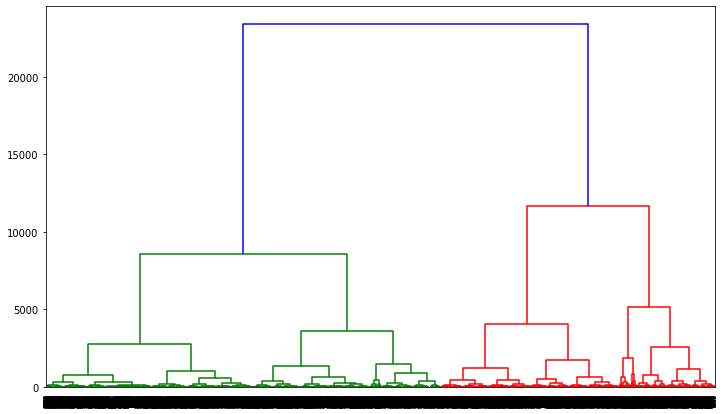

In [24]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)

### What is the optimal number of clusters?

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

As we pick $10000$ as a threshold. The number of clusters is the number of branches cut off at the threshold. In our case, there are $3$ branches at the $10000$ threshold. We choose $3$ clusters.

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [25]:
# Import useful library for creating an agglomerative model
from sklearn.cluster import AgglomerativeClustering 

# Create the model
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
label = hc.fit_predict(X)

Determine the labes of the clustering model.

In [26]:
hc.labels_

array([1, 2, 1, ..., 2, 0, 0])

In [27]:
X[:,0]

array([1360., 1292., 1402., ..., 1142., 1003., 1071.])

### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

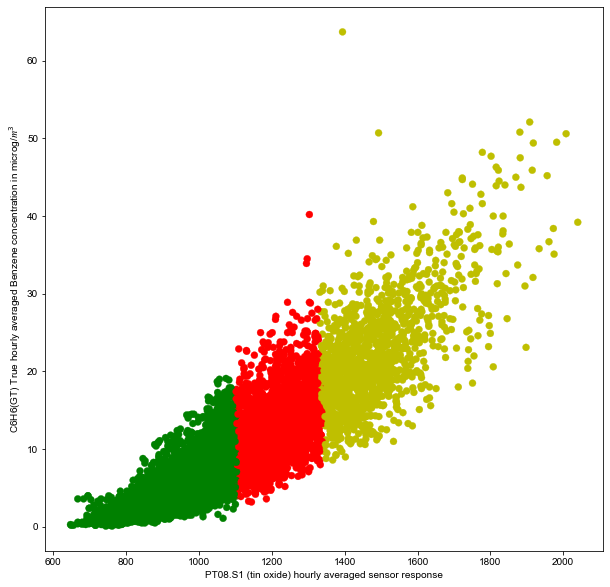

In [28]:
colors = {0 : 'g',
          1 : 'y',
          2 : 'r'} # map integer label to color
label_color = [colors[l] for l in label]

plt.figure('Agglomerative Clustering for k=3', figsize=(10,10))
plt.xlabel('PT08.S1 (tin oxide) hourly averaged sensor response')
plt.ylabel('C6H6(GT) True hourly averaged Benzene concentration in microg/$𝑚^3$')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=label_color, cmap=cmap)

### Performance

In [29]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, label)

0.42032058075270673

### Interpretation

The Dendogram curve gived us information on number of clusters, we could use for plotting our visualization clusters with a scatter plot, as we pick different numbers of points as a threshold.
- With dendogram shows all the possible linkages between clusters.
- We have no need to preset the number of clusters (like in the case of K-means)
- We  understand the data much, much better.

We are able to determine 3 clusters and group the measurements. One possible explanation for the clusters observed between the tin oxide sensor and Benzene concentration could be the interference from solution of Benzene with other pollutants to be measured by the tin oxide sensor and even other sensors.

Furthermore, with $3$ clusters, we have slightly accurate model agglomerative clustering.

### More clusters

Do more clusters mean anything?

Begin with 5 clusters.

Since the number of clusters is already predefined, we are going to use K-means methods. 

### K-means Clustering

In [30]:
X = df[['PT08.S1(CO)', 'C6H6(GT)']].values
X

array([[1360. ,   11.9],
       [1292. ,    9.4],
       [1402. ,    9. ],
       ...,
       [1142. ,   12.4],
       [1003. ,    9.5],
       [1071. ,   11.9]])

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=5)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the $5$ clusters:

In [32]:
y_pred

array([1, 1, 1, ..., 3, 0, 0], dtype=int32)

In [33]:
y_pred is kmeans.labels_

True

And the following $5$ centroids (i.e., cluster centers) are estimated:

In [34]:
kmeans.cluster_centers_

array([[1028.21761327,    7.56384812],
       [1364.56373293,   17.97579666],
       [ 862.97298421,    3.44380715],
       [1179.87461459,   11.95477903],
       [1599.24050633,   26.60289331]])

In [35]:
kmeans.labels_

array([1, 1, 1, ..., 3, 0, 0], dtype=int32)

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Benzene_tinOxide_diagram_:

In [36]:
import os
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=3.5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=5000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("PT08.S1 (tin oxide) hourly averaged sensor response", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("C6H6(GT)$", fontsize=14, rotation =90)
    else:
        plt.tick_params(labelleft=False)
        
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure Benzene_tinOxide_plot


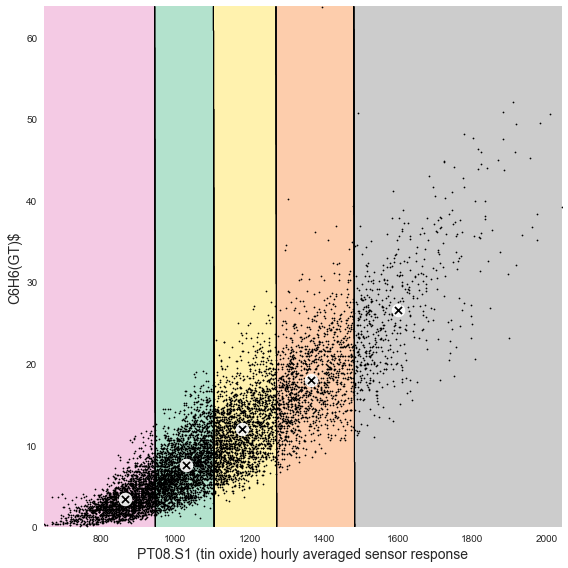

In [37]:
plt.figure(figsize=(8, 8))
plot_decision_boundaries(kmeans, X)
save_fig("Benzene_tinOxide_plot")
plt.show()

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

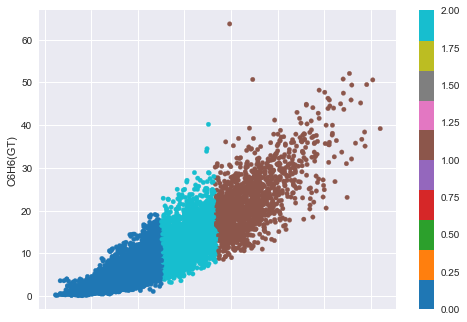

In [38]:
df1 = df[['PT08.S1(CO)', 'C6H6(GT)']]
cmap = 'tab10'
df1.plot(x = 'PT08.S1(CO)', y ='C6H6(GT)', c=label, cmap='tab10', kind ='scatter')

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

In [39]:
metrics.silhouette_score(X, y_pred)

0.5316265992816817

#### The K-Means algorithm is implemented as follow:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [40]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=5,
       tol=0.0001, verbose=0)

We can verify that this is indeed the Euclidian distance between each instance and each centroid:

Saving figure kmeans_algorithm_plot


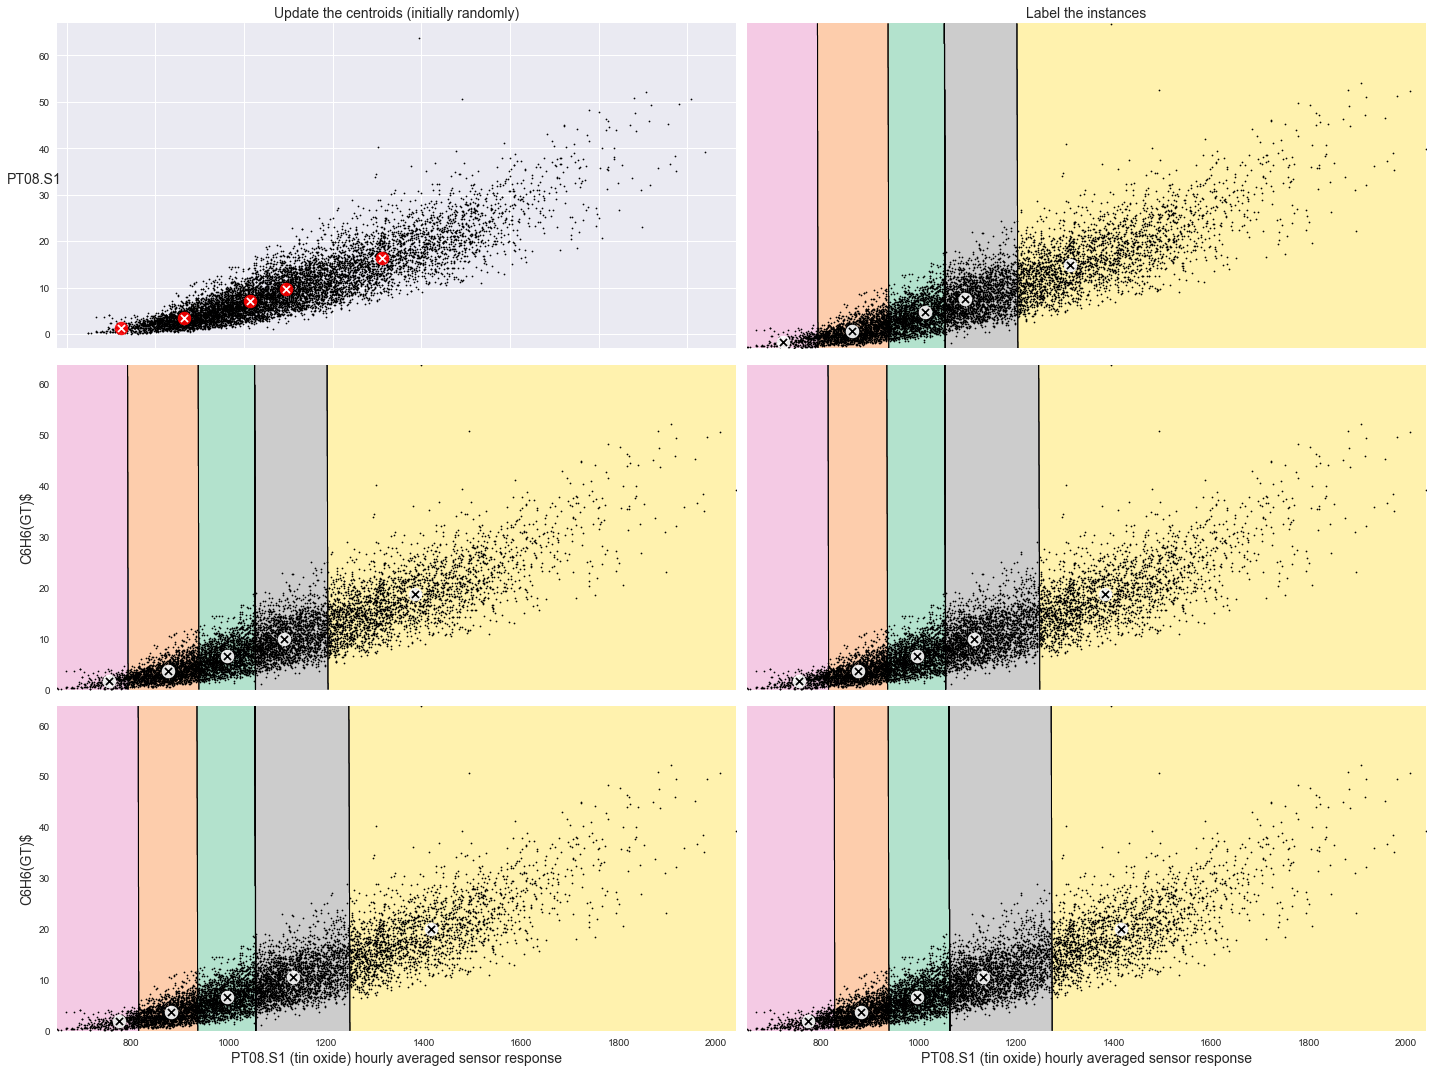

In [41]:
plt.figure(figsize=(20, 15))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("PT08.S1", fontsize=14, 
           rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

### Finding the optimal number of clusters.

What if the number of clusters was set to a lower or greater value than 5?

In [42]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure clusters_plot


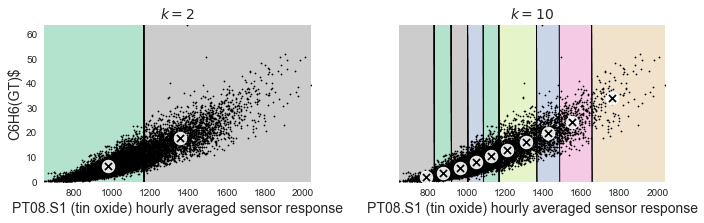

In [43]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k10 = KMeans(n_clusters=10, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k10, df[['PT08.S1(CO)', 'C6H6(GT)']].values, "$k=2$", "$k=10$")
save_fig("clusters_plot")
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
y1 = kmeans_k2.fit_predict(X)
y2 = kmeans_k10.fit_predict(X)
print('Silhouette score of model for 2 clusters:' + str(silhouette_score(X, y1)))
print('Silhouette score of model for 10 clusters:' + str(silhouette_score(X, y2)))

Silhouette score of model for 2 clusters:0.6035142604561248
Silhouette score of model for 10 clusters:0.523460271615147


### Optimal number of clusters using Silhouette Score Method

Let's plot the silhouette score as a function of  number of clusters 𝑘:

In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)
y_preds = [KMeans(n_clusters=k, random_state=5).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in y_preds[1:]]

Saving figure silhouette_score_vs_k_plot


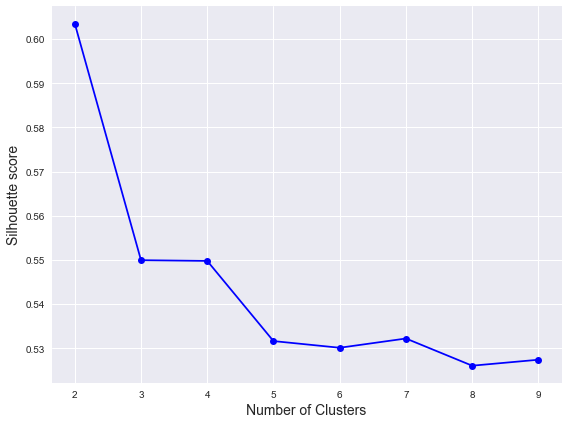

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

### Interpretation

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=2$ is a very good choice, but it also underlines the fact that $k=3$, or $k=4$ are quite good as well.

Furthermore, when the number of cluster increases the Silhouette Score decreases and this could be due to the interference of Benzene solution with of co-polluant produce by other sensors features. 


An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

Saving figure silhouette_analysis_plot


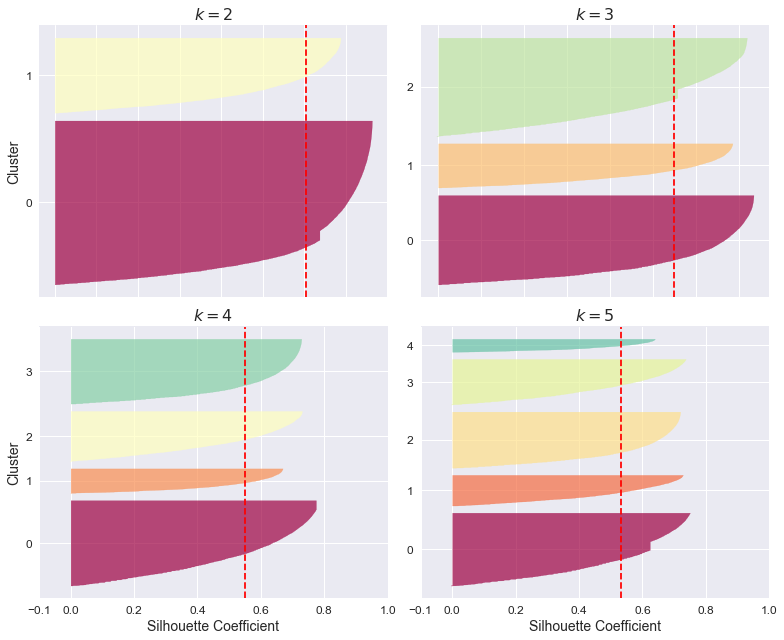

In [51]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = y_preds[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Interpretation

Rather than arbitrarily choosing the closest cluster for each instance,  it might be better measure the distance of each instance to all $5$ centroids. This is what the transform() method does:

For 10 clusters.

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=5)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the  $10$  clusters:

In [53]:
y_pred

array([9, 9, 2, ..., 6, 7, 3], dtype=int32)

And the following  $10$  centroids (i.e., cluster centers) are estimated:

In [54]:
kmeans.cluster_centers_

array([[ 886.56770456,    3.81404779],
       [1221.375     ,   13.2248913 ],
       [1426.51894563,   19.92586491],
       [1056.0336758 ,    8.35605023],
       [1763.20454545,   34.03030303],
       [ 791.28187919,    2.1685906 ],
       [1134.51174935,   10.6051349 ],
       [ 972.3029703 ,    5.95544554],
       [1551.72222222,   24.50580808],
       [1316.12105263,   16.40763158]])

In [55]:
kmeans.labels_

array([9, 9, 2, ..., 6, 7, 3], dtype=int32)

#### Visualisation of the scatter plot of C6H6(GT) and PT08.S1

Saving figure Benzene_tinOxide_plot


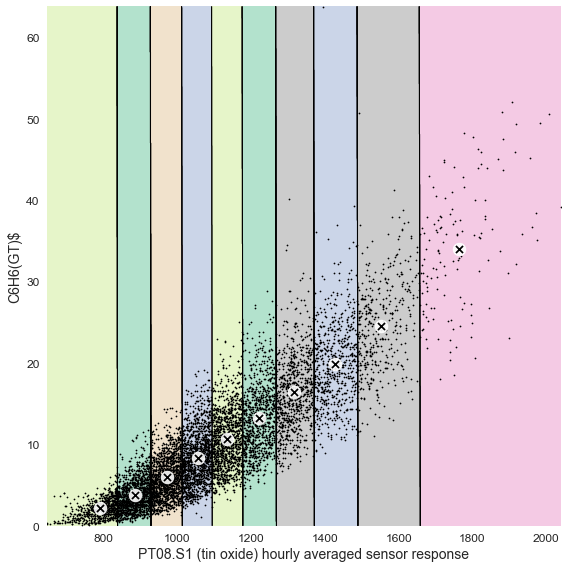

In [56]:
plt.figure(figsize=(8, 8))
plot_decision_boundaries(kmeans, X)
save_fig("Benzene_tinOxide_plot")
plt.show()

In [57]:
metrics.silhouette_score(X, y_pred)

0.5252176741626408

### Optimal number of clusters using Elbow Curve Method 

Prove a interpretation for the performance variation when the number of clusters are increased.

Text(0.5, 1.0, 'Elbow Curve')

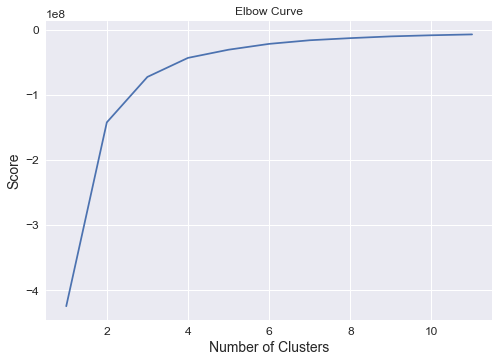

In [58]:
n_clusters = range(1, 12) # range for number of clusters

kmeans = [KMeans(n_clusters=i) for i in n_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(n_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

The score values starts to increase slowly after $4$ clusters. Set $k = 4$ as the optimal number of clusters. 

Let's study the case of $k=4$ clsters. 

In [59]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4, random_state=5)
y_pred1 = kmean.fit_predict(X)

In [60]:
y_pred1

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

And the following  $4$  centroids (i.e., cluster centers) are estimated:

In [61]:
kmean.cluster_centers_

array([[1054.50492264,    8.31302391],
       [1523.61643836,   23.64951076],
       [1257.09759615,   14.45009615],
       [ 872.96074074,    3.65911111]])

In [62]:
kmean.labels_

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

#### Visualisation of the scatter plot of C6H6(GT) and PT08.S1

Saving figure Benzene_tinOxide_plot


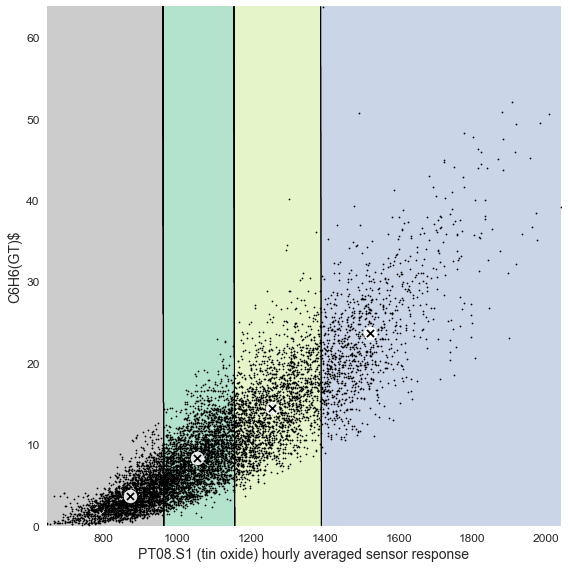

In [63]:
plt.figure(figsize=(8, 8))
plot_decision_boundaries(kmean, X)
save_fig("Benzene_tinOxide_plot")
plt.show()

In [64]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred1)

0.5497721673936168

### Summary

We used k-Means clustering to determine the underlying structure of the data. The elbow method was used to determine an optimal number of clusters. With this cluster number, the model predicted that two metal oxide sensors were able to group data points into the five clusters. A silhoutte coefficient determined how well a data point was grouped. We also compared k-Means performance with agglomerative clustering.

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)